In [1]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text
from keras import utils

from sklearn.feature_extraction.text import CountVectorizer #, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


In [2]:
# Read json into pandas dataframe
df = pd.read_json("final_data_for_machine_learning.json")

In [3]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['score'], random_state=1)

In [4]:
X_train

31816                                             Love this
142787                                I am the middle child
25903                                        I love foxes 🦊
133153                                                    🙂
89463     1:36 that is just... so funny still. Also saw ...
                                ...                        
73349     i feel like dream is more of the hunter then t...
109259                                       サムネの横顔美しすぎるやろ。
50057                                        Sangat terharu
5192      oh my god i remember watching this with my bro...
128037                                           7:07 -Dead
Name: processed_text, Length: 142116, dtype: object

In [5]:
X_test

68606                              this war still going on?
172913    yk he wanted to pick the pretty one but if he ...
79507     Those kids did something that no other kid has...
82489                    Nahhh I still do not believe them,
32984     It is been fairly long since this video was up...
                                ...                        
69389                                   I LOVE YOU MR Beast
180390                           Buzzfeed sucks ass anyway.
43717                                                    🤣🤣
42222                         Am I the only 29 y/o here? 😂😅
9812      Once again 57% say Biden is not doing enough f...
Name: processed_text, Length: 47373, dtype: object

In [6]:
nb = Pipeline([('vect', CountVectorizer()),
              ('clf', MultinomialNB())])
nb.fit(X_train, y_train)
class_log_prior = nb.named_steps['clf'].class_log_prior_
feature_log_prob = nb.named_steps['clf'].feature_log_prob_
class_prior = np.exp(class_log_prior)
feature_prob = np.exp(feature_log_prob)
y_pred = nb.predict(X_test)
print((accuracy_score(y_pred, y_test)))

0.688535663774724


In [7]:
# temp_y_train = []
# temp_y_test = []
# pred = []
# for i in y_train:
#     temp_y_train.append(i)
# for i in y_test:
#     temp_y_test.append(i)
# vectorizer = CountVectorizer(min_df=1,max_features = 10000)
# X = vectorizer.fit_transform(X_train).toarray()
# clf = RandomForestClassifier()
# clf.fit(X, temp_y_train)
# pred.append(clf.predict(vectorizer.transform(X_test).toarray()))
# accuracy = 0
# k = 0
# for i in pred:
#     for j in i:
#         if temp_y_test[k]==j:
#             accuracy+=1
#             k+=1
# print(accuracy/k)

In [8]:
# vectorizer = CountVectorizer(min_df=1,max_features = 10000)
# X = vectorizer.fit_transform(X_train).toarray()
# tfidf_transformer = TfidfTransformer()
# tfidf_matrix = tfidf_transformer.fit_transform(X)
# print(tfidf_matrix)

In [9]:
def neural_net():
  train_comments =X_train
  train_labels = y_train
  test_comments = X_test
  test_labels = y_test

  max_words = 10000
  tokenize = text.Tokenizer(num_words=max_words, char_level=False)
  tokenize.fit_on_texts(train_comments)

  x_tra = tokenize.texts_to_matrix(train_comments)
  x_tes = tokenize.texts_to_matrix(test_comments)

  encoder = LabelEncoder()
  encoder.fit(train_labels)
  y_tra = encoder.transform(train_labels)
  y_tes = encoder.transform(test_labels)

  num_classes = np.max(y_tra) + 1
  y_tra = utils.to_categorical(y_tra, num_classes)
  y_tes = utils.to_categorical(y_tes, num_classes)

  batch_size = 32
  epochs = 5

  model = Sequential()
  model.add(Dense(512, input_shape=(max_words,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
                
  history = model.fit(x_tra, y_tra,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_split=0.3)
  
  score = model.evaluate(x_tes, y_tes,
                       batch_size=batch_size, verbose=1)
  return score[1]


In [10]:
print(neural_net())

2023-08-20 08:23:04.230932: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-08-20 08:23:04.230957: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-20 08:23:04.230965: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-20 08:23:04.231596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-20 08:23:04.231803: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5
   1/3109 [..............................] - ETA: 25:16 - loss: 1.0967 - accuracy: 0.2812

2023-08-20 08:23:11.573704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3109/3109 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.7187

2023-08-20 08:23:44.289850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3109/3109 [==============================] - 40s 13ms/step - loss: 0.6962 - accuracy: 0.7187 - val_loss: 0.6350 - val_accuracy: 0.7493
Epoch 2/5
3109/3109 [==============================] - 42s 13ms/step - loss: 0.6141 - accuracy: 0.7620 - val_loss: 0.6377 - val_accuracy: 0.7501
Epoch 3/5
3109/3109 [==============================] - 42s 13ms/step - loss: 0.5906 - accuracy: 0.7708 - val_loss: 0.6349 - val_accuracy: 0.7542
Epoch 4/5
3109/3109 [==============================] - 41s 13ms/step - loss: 0.5830 - accuracy: 0.7755 - val_loss: 0.6416 - val_accuracy: 0.7504
Epoch 5/5
1481/1481 [==============================] - 9s 6ms/step - loss: 0.6580 - accuracy: 0.7458
0.7458045482635498


In [11]:
def svm():
  sgd = Pipeline([('vect', CountVectorizer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
  sgd.fit(X_train, y_train)

  y_pred = sgd.predict(X_test)
  return accuracy_score (y_pred,y_test)


In [12]:
print(svm())

0.6907310071137568


In [13]:
def logistic_regression():
  logreg = Pipeline([('vect', CountVectorizer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
  logreg.fit(X_train, y_train)


  y_pred = logreg.predict(X_test)

  return (accuracy_score(y_pred, y_test))

In [14]:
print(logistic_regression())

/Users/vinnyshankar/anaconda3/envs/p4/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.732252548920271


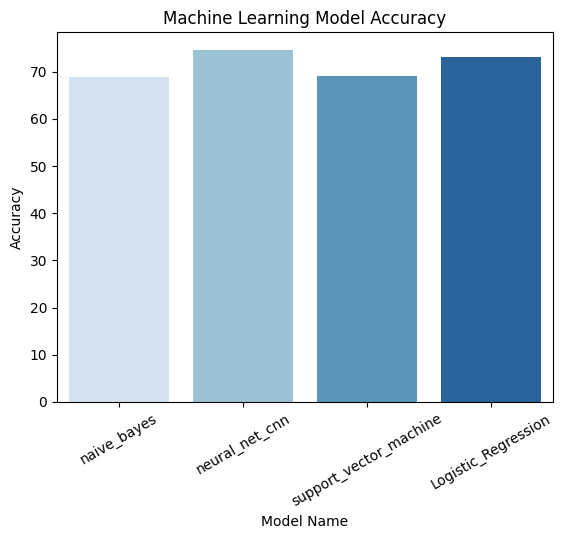

In [20]:
model = ['naive_bayes','neural_net_cnn','support_vector_machine','Logistic_Regression']
model_accuracy= [68.9,74.6,69.1,73.2]
df = pd.DataFrame(model, columns=['Model Name'])
df['Accuracy']=model_accuracy
sns.barplot(data=df,x='Model Name',y='Accuracy',palette = "Blues").set_title("Machine Learning Model Accuracy")
plt.xticks(rotation = 30)
plt.show()